 Перші 5 рядків даних:
   Вік Стать     Доход Тип_клієнта  Рівень_знижки Рекламна_розсилка Купив
0   56     Ж   низький       новий              0               так    ні
1   46     Ж   високий       новий             20                ні    ні
2   32     Ч   низький   постійний             20                ні   так
3   60     Ч  середній       новий              0                ні    ні
4   25     Ч   низький       новий             20               так    ні

 Точність моделі: 66,67%

 Звіт класифікації:
              precision    recall  f1-score   support

    Не купив       0.67      0.67      0.67        15
       Купив       0.67      0.67      0.67        15

    accuracy                           0.67        30
   macro avg       0.67      0.67      0.67        30
weighted avg       0.67      0.67      0.67        30


 Важливість ознак:
              Ознака  Важливість
0                Вік    0.463986
3        Тип_клієнта    0.296340
5  Рекламна_розсилка    0.111398
1      

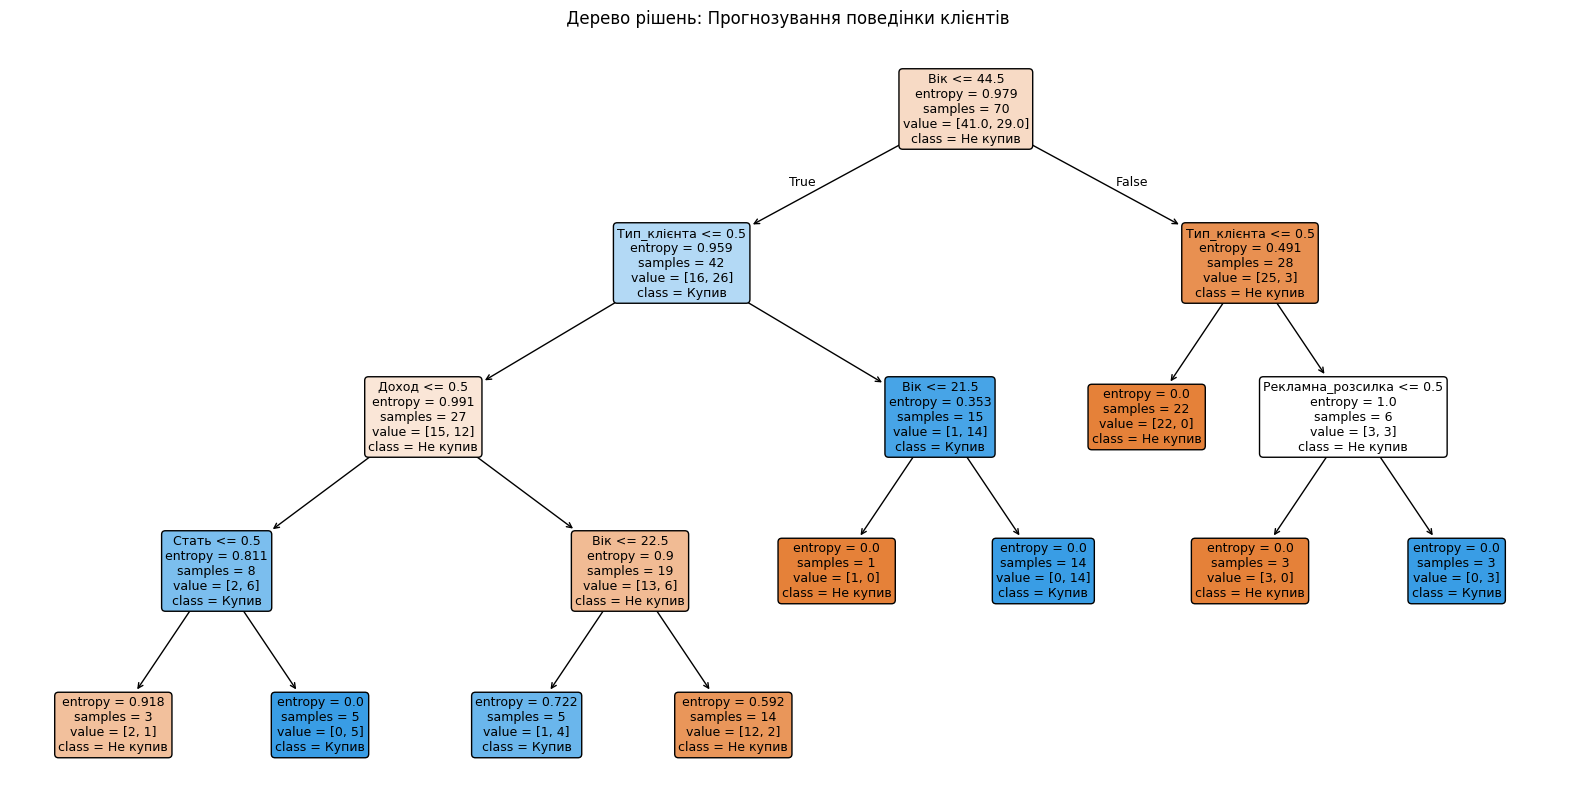


 Порівняння реальних і передбачених результатів:
   Реальне  Передбачене
0        0            0
1        0            0
2        1            1
3        1            0
4        0            0
5        0            1
6        0            1
7        1            1
8        1            1
9        1            0


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt


np.random.seed(42)


n = 100
data = {
    'Вік': np.random.randint(18, 65, n),
    'Стать': np.random.choice(['Ч', 'Ж'], n),
    'Доход': np.random.choice(['низький', 'середній', 'високий'], n, p=[0.4, 0.4, 0.2]),
    'Тип_клієнта': np.random.choice(['новий', 'постійний'], n, p=[0.6, 0.4]),
    'Рівень_знижки': np.random.choice([0, 5, 10, 15, 20], n),
    'Рекламна_розсилка': np.random.choice(['так', 'ні'], n, p=[0.5, 0.5])
}


df = pd.DataFrame(data)


def купив(row):
    score = 0
    if row['Доход'] == 'високий':
        score += 2
    elif row['Доход'] == 'середній':
        score += 1
    if row['Тип_клієнта'] == 'постійний':
        score += 2
    if row['Рівень_знижки'] >= 10:
        score += 1
    if row['Рекламна_розсилка'] == 'так':
        score += 1
    if row['Вік'] > 45:
        score -= 1
    return 'так' if score >= 3 else 'ні'


df['Купив'] = df.apply(купив, axis=1)


print(" Перші 5 рядків даних:")
print(df.head())


le = LabelEncoder()
for col in ['Стать', 'Доход', 'Тип_клієнта', 'Рекламна_розсилка', 'Купив']:
    df[col] = le.fit_transform(df[col])


X = df.drop('Купив', axis=1)
y = df['Купив']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)


model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=7)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


acc = accuracy_score(y_test, y_pred) * 100
formatted_acc = f"{acc:.2f}%".replace('.', ',')


print(f"\n Точність моделі: {formatted_acc}")
print("\n Звіт класифікації:")
print(classification_report(y_test, y_pred, target_names=['Не купив', 'Купив']))


importances = pd.DataFrame({
    'Ознака': X.columns,
    'Важливість': model.feature_importances_
}).sort_values(by='Важливість', ascending=False)


print("\n Важливість ознак:")
print(importances)


plt.figure(figsize=(20, 10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=['Не купив', 'Купив'],
    filled=True,
    rounded=True,
    fontsize=9
)
plt.title(" Дерево рішень: Прогнозування поведінки клієнтів")
plt.show()


results = pd.DataFrame({
    'Реальне': y_test,
    'Передбачене': y_pred
}).reset_index(drop=True)


print("\n Порівняння реальних і передбачених результатів:")
print(results.head(10))

In [2]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules


np.random.seed(42)


n = 100
data = {
    'Вік': np.random.randint(18, 65, n),
    'Стать': np.random.choice(['Ч', 'Ж'], n),
    'Доход': np.random.choice(['низький', 'середній', 'високий'], n, p=[0.4,0.4,0.2]),
    'Тип_клієнта': np.random.choice(['новий','постійний'], n, p=[0.6,0.4]),
    'Рівень_знижки': np.random.choice([0,5,10,15,20], n),
    'Рекламна_розсилка': np.random.choice(['так','ні'], n, p=[0.5,0.5])
}


df = pd.DataFrame(data)


def купив(row):
    score = 0
    if row['Доход']=='високий':
        score +=2
    elif row['Доход']=='середній':
        score +=1
    if row['Тип_клієнта']=='постійний':
        score +=2
    if row['Рівень_знижки']>=10:
        score +=1
    if row['Рекламна_розсилка']=='так':
        score +=1
    if row['Вік']>45:
        score -=1
    return 'так' if score>=3 else 'ні'


df['Купив'] = df.apply(купив, axis=1)


print("Перші 5 рядків даних:")
print(df.head())


df_onehot = pd.get_dummies(df.astype(str))


frequent_itemsets = apriori(df_onehot, min_support=0.1, use_colnames=True)


rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)


rules = rules.sort_values(by='lift', ascending=False)


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 150)


print("\nНайсильніші асоціативні правила:")
display_rules = rules[['antecedents','consequents','support','confidence','lift']].head(10)


formatted_rules = display_rules.copy()
formatted_rules['support'] = formatted_rules['support'].map('{:.5f}'.format)
formatted_rules['confidence'] = formatted_rules['confidence'].map('{:.5f}'.format)
formatted_rules['lift'] = formatted_rules['lift'].map('{:.5f}'.format)


print(formatted_rules)

Перші 5 рядків даних:
   Вік Стать     Доход Тип_клієнта  Рівень_знижки Рекламна_розсилка Купив
0   56     Ж   низький       новий              0               так    ні
1   46     Ж   високий       новий             20                ні    ні
2   32     Ч   низький   постійний             20                ні   так
3   60     Ч  середній       новий              0                ні    ні
4   25     Ч   низький       новий             20               так    ні

Найсильніші асоціативні правила:
                              antecedents                           consequents  support confidence     lift
150            (Купив_так, Доход_низький)               (Тип_клієнта_постійний)  0.11000    1.00000  3.03030
153               (Тип_клієнта_постійний)            (Купив_так, Доход_низький)  0.11000    0.33333  3.03030
344    (Доход_низький, Тип_клієнта_новий)     (Рекламна_розсилка_так, Купив_ні)  0.16000    0.61538  2.93040
345     (Рекламна_розсилка_так, Купив_ні)    (Доход_низький, Тип

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
